In [1]:
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd

## Generate test data

In [2]:
df = file_parser.generate_test_data(phase = 0, n_components = 1, name="test1", noise=0.5, replicates = 3)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="test2", noise=0.5, replicates = 3)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="test3", noise=0.5, replicates = 3, time_step=1)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="test4", noise=0.5, replicates = 3, time_step=1)
df = df.append(df2, ignore_index=True)

These data can be exported to either excel or csv format

In [3]:
file_parser.export(df,"test_data\\independent_data.xlsx")

In [4]:
file_parser.export_csv(df,"test_data\\independent_data.csv")

In [5]:
#df = file_parser.read_excel("test_data\\data.xlsx")

## Plot periodograms

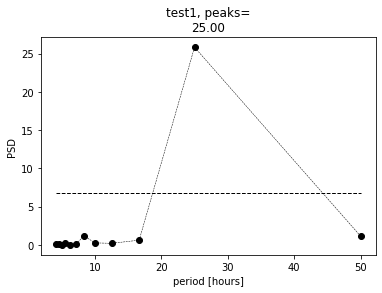

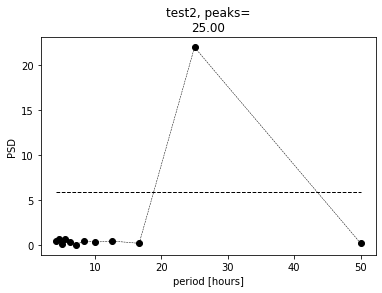

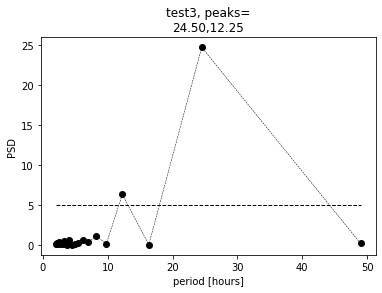

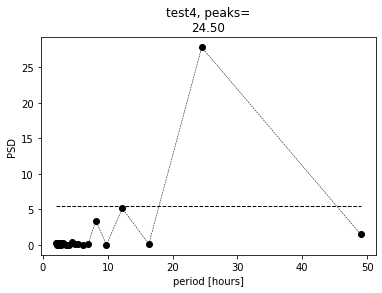

In [6]:
cosinor.periodogram_df(df)

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

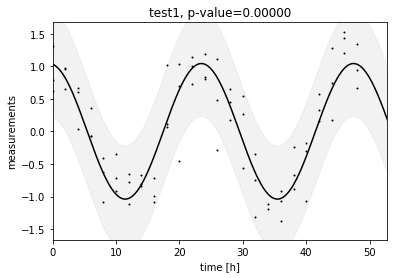

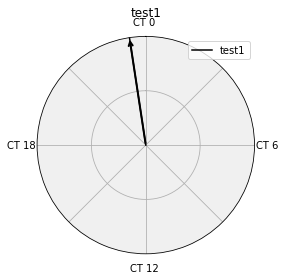

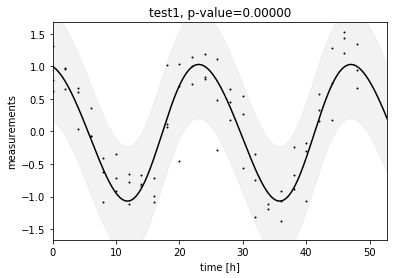

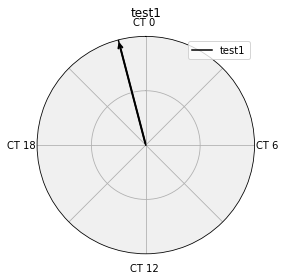

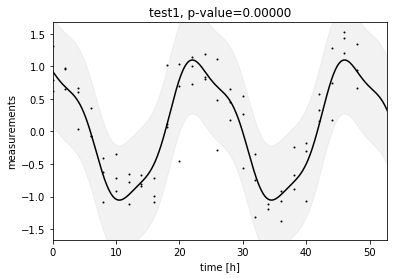

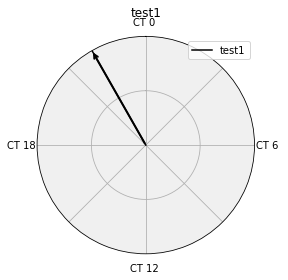

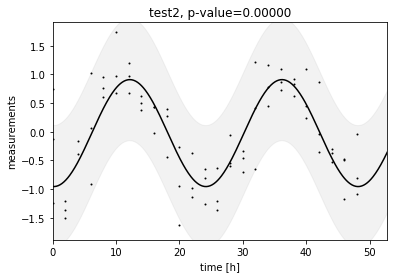

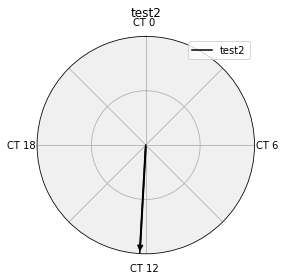

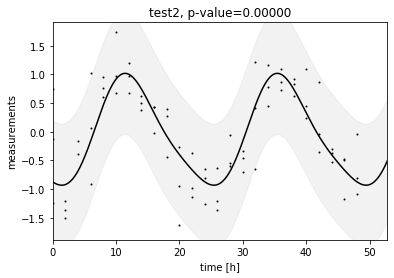

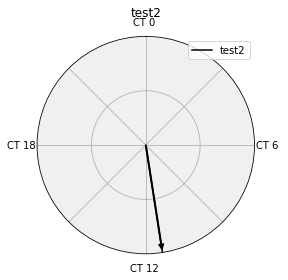

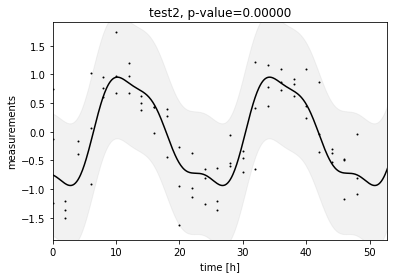

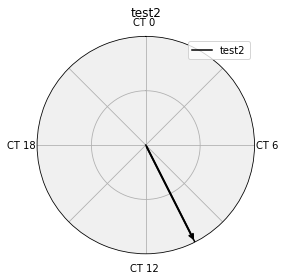

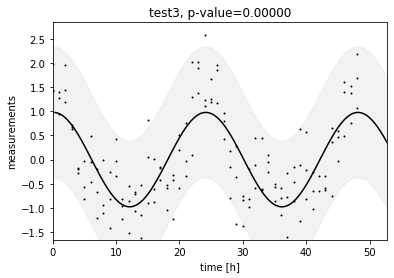

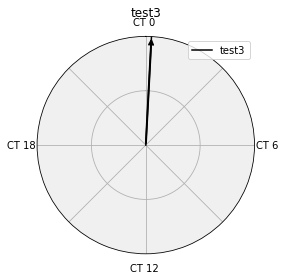

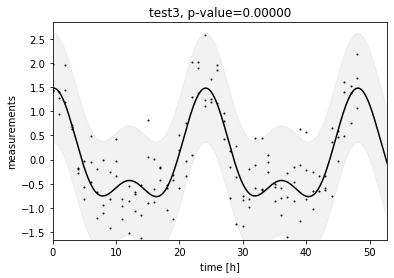

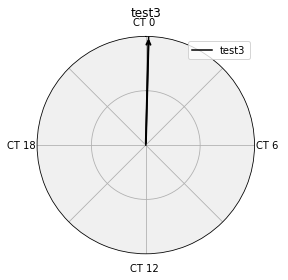

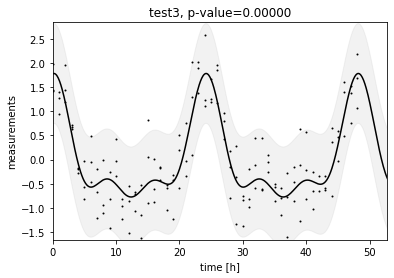

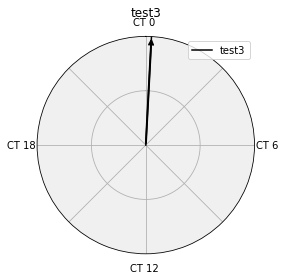

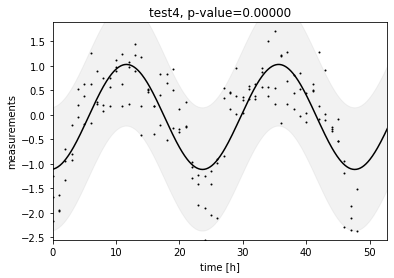

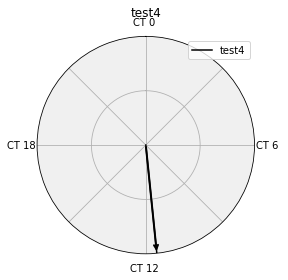

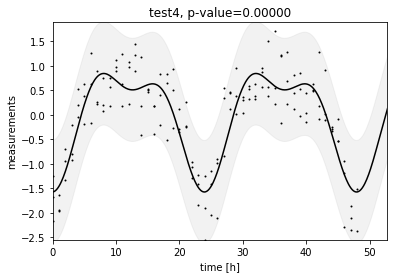

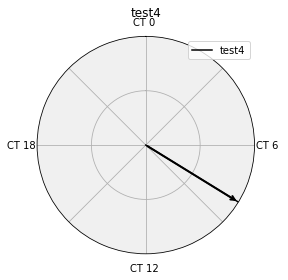

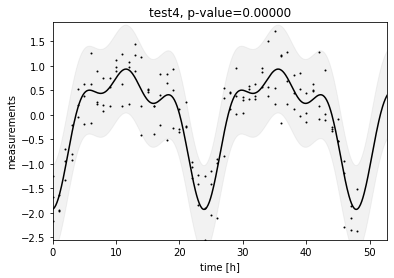

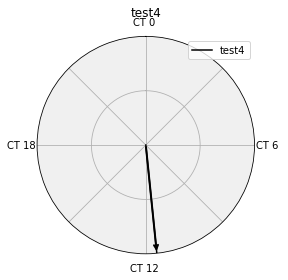

In [7]:
df_results = cosinor.fit_group(df, n_components = [1,2,3], period=24) #folder=""

Get the best fitting periods with criterium 'RSS' (```reverse=False``` means lower is better)

In [8]:
df_best_fits = cosinor.get_best_fits(df_results, n_components = [1,2,3], criterium='RSS', reverse = False)

or get the best models (the best fitting periods and the best fitting models - in dependence on the number of components; by default the criterium is p-value)

In [9]:
df_best_models = cosinor.get_best_models(df, df_results, n_components = [1,2,3])

... and plot these models (together with qq-plots and phase diagrams).

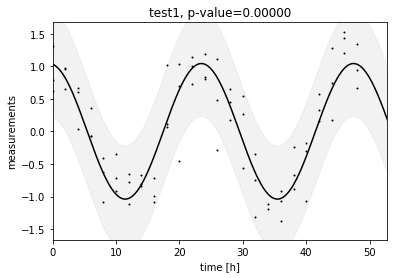

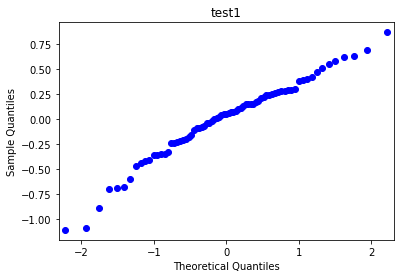

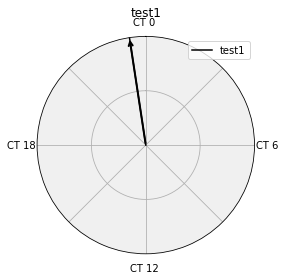

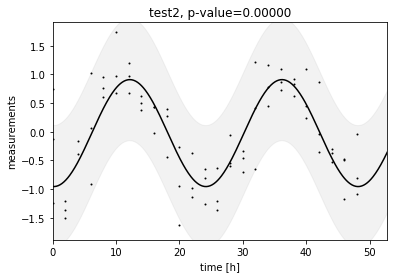

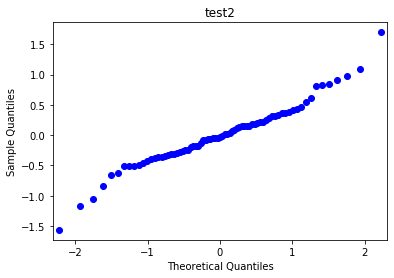

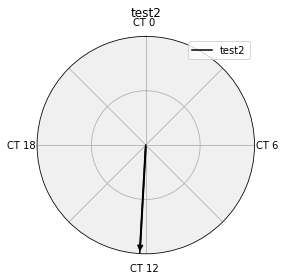

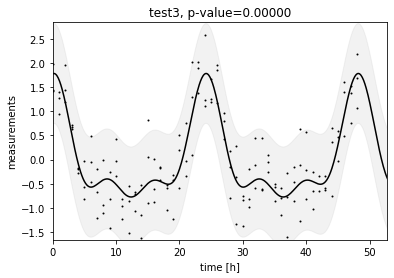

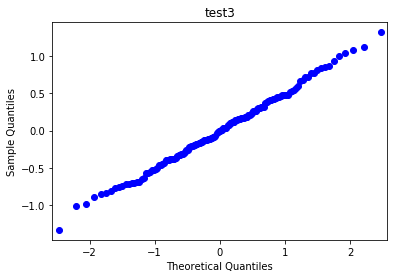

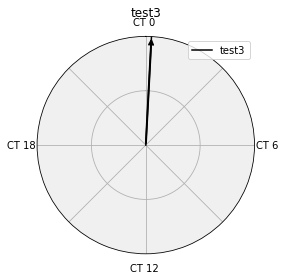

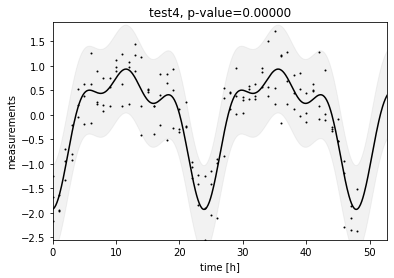

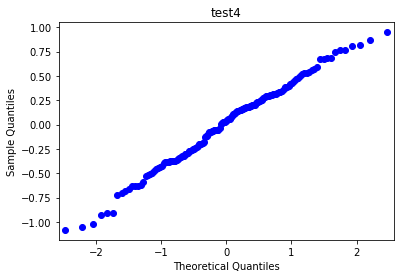

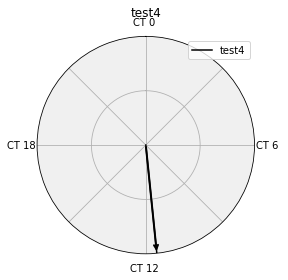

In [10]:
#cosinor.plot_df_models(df, df_best_models, folder="paper")
cosinor.plot_df_models(df, df_best_models)

Display the results or store the results as a csv file:

In [11]:
df_best_models.to_csv("demo_independent_cosinor_best.csv", index=False)

## Cosinor1 analysis

Only 1-component model can be used, but the statistics is much richer...

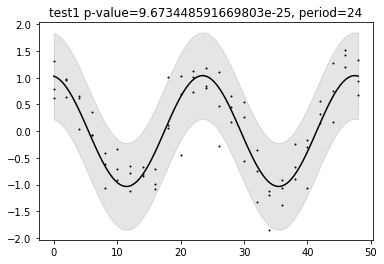

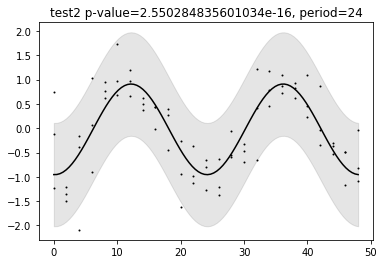

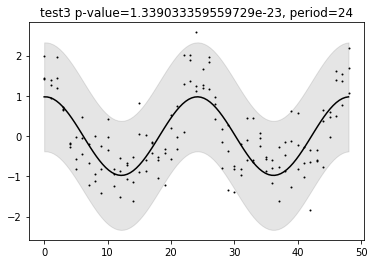

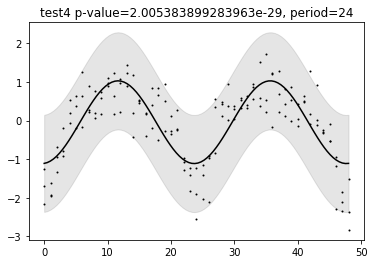

In [12]:
df_results = cosinor1.fit_group(df, period=[24])

In [13]:
df_results

,test,p,q,amplitude,p(amplitude),q(amplitude),acrophase,p(acrophase),q(acrophase),acrophase[h],period
0,test1,9.673449e-25,1.934690e-24,1.039766,4.961273e-59,1.984509e-58,0.141459,0.000000e+00,0.000000e+00,-0.540333,24.0
1,test2,2.550285e-16,2.550285e-16,0.932111,1.260954e-28,1.260954e-28,3.094333,2.475596e-254,3.300794e-254,-11.819481,24.0
2,test3,1.339033e-23,1.785378e-23,0.976146,1.229948e-35,1.639931e-35,6.240175,5.993451e-01,5.993451e-01,-23.835713,24.0
3,test4,2.005384e-29,8.021536e-29,1.071633,5.171703e-49,1.034341e-48,3.233446,0.000000e+00,0.000000e+00,-12.350853,24.0


## Comparison analysis

Define the pairs to compare

In [14]:
pairs = (["test1", "test2"],["test3", "test4"])

### Comparison using cosinor1
The most informative

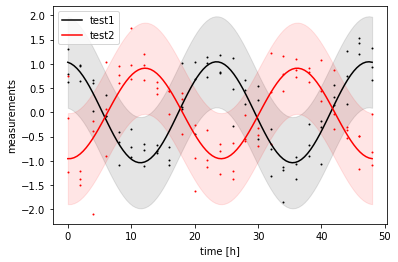

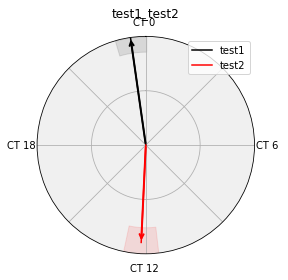

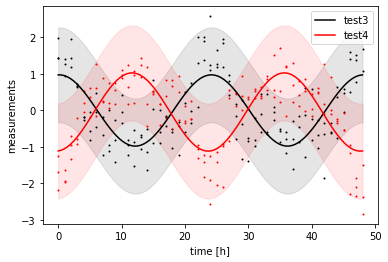

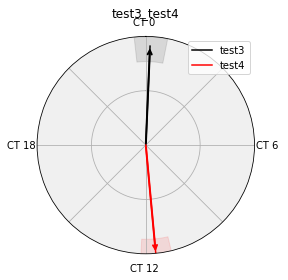

In [15]:
#compare_cosinor1 = cosinor1.test_cosinor_pairs(df, pairs, period=24, folder='paper' )
compare_cosinor1 = cosinor1.test_cosinor_pairs(df, pairs, period=24)

In [16]:
compare_cosinor1[["test", "q(d_amplitude)", "q(d_acrophase)"]]

,test,q(d_amplitude),q(d_acrophase)
0,test1 vs. test2,0.372013,1.164985e-153
1,test3 vs. test4,0.372013,9.622936e-174


### Comparison using multi-component cosinor and LimoRhyde

Use an 1-component cosinor for first pair

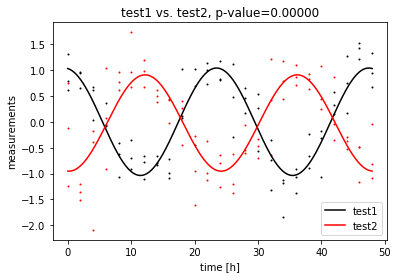

In [17]:
df_cosinor_lm1 = cosinor.compare_pairs(df, pairs[:1], n_components = 1, period = 24)#, folder = 'results\\test_limo_tester\\')

In [18]:
df_cosinor_lm1

,test,period,n_components,p1,p2,p3,param1,param2,param3,q1,q2,q3
0,test1 vs. test2,24.0,1.0,0.351847,5.180330e-40,0.747571,0.102559,-1.960451,-0.024568,0.351847,5.180330e-40,0.747571


Use a 3-component cosinor for second pair

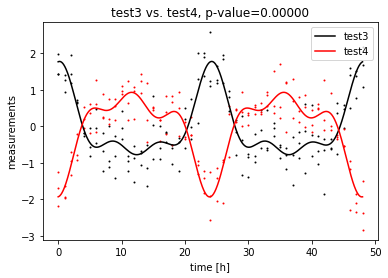

In [19]:
df_cosinor_lm2 = cosinor.compare_pairs(df, pairs[1:], n_components = 3, period = 24)#, folder = 'results\\test_limo_tester\\')

In [20]:
df_cosinor_lm2

,test,period,n_components,p1,p2,p3,p4,p5,p6,param1,...,param3,param4,param5,param6,q1,q2,q3,q4,q5,q6
0,test3 vs. test4,24.0,3.0,0.480451,4.208287e-74,0.427944,9.921005e-30,0.761447,1.425138e-17,0.056323,...,-0.063287,-0.999144,-0.024225,-0.714334,0.480451,4.208287e-74,0.427944,9.921005e-30,0.761447,1.425138e-17


### Comparison using non-linear regression

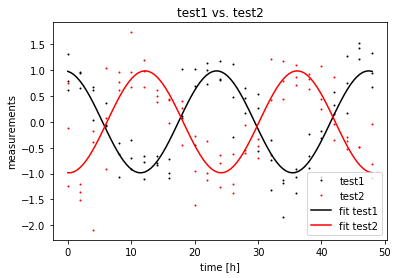

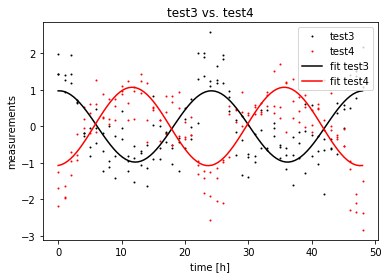

In [21]:
df_cosinor_nonlin = cosinor.compare_nonlinear_pairs(df, pairs, min_per=23.99, max_per=24)#, folder = 'results\\test_nonlin_tester\\')

In [22]:
df_cosinor_nonlin

,test,p,q,p_reject,q_reject,Amp,Base,ME,Per,Phase,...,p(dBase),p(dPhase),q(Amp),q(Base),q(Per),q(Phase),q(dAmp),q(dBase),q(dPhase),resid_SE
0,test1 vs. test2,1.110223e-16,1.110223e-16,1.0,1.0,0.986710,1.403582e-14,0.927775,23.99,0.138103,...,1.0,0.0,0.0,1.0,0.0,0.297053,1.000000,1.0,0.0,0.469357
1,test3 vs. test4,1.110223e-16,1.110223e-16,1.0,1.0,0.976128,8.415654e-17,1.292206,24.00,6.240174,...,1.0,0.0,0.0,1.0,0.0,0.000000,0.731232,1.0,0.0,0.656521
